In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_up = pd.read_csv("../data/5_yr_data/UP5_years.csv")
df_up['datetime'] = pd.to_datetime(df_up['date'])
df_up.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df_up.sort_values(by="datetime", ascending=True, inplace=True)
df_up.head()

,district_name,market_name,commodity,variety,grade,min_rs_quintal,max_rs_quintal,modal_rs_quintal,date,year,month,day_of_month,datetime
714742,Bijnor,Bijnaur,Onion,Red,FAQ,2950.0,3040.0,3000.0,01 Jan 2018,2018,Jan,1,2018-01-01
433767,Mau(Maunathbhanjan),Kopaganj,Wheat,Dara,FAQ,1525.0,1625.0,1575.0,01 Jan 2018,2018,Jan,1,2018-01-01
439485,Gorakhpur,Gorakhpur,Wheat,Dara,FAQ,1560.0,1590.0,1575.0,01 Jan 2018,2018,Jan,1,2018-01-01
83163,Shahjahanpur,Tilhar,Potato,Potato,FAQ,490.0,510.0,500.0,01 Jan 2018,2018,Jan,1,2018-01-01
730321,Bulandshahar,Divai,Onion,Red,FAQ,2800.0,3000.0,2900.0,01 Jan 2018,2018,Jan,1,2018-01-01


In [3]:
TRAIN_LEN = int(0.8 * len(df_up))
up_train, up_test = (df_up[:TRAIN_LEN],df_up[TRAIN_LEN:])
up_train.set_index('datetime', inplace=True)
up_train.sort_index(inplace=True)
up_test.set_index('datetime', inplace=True)
up_test.sort_index(inplace=True)

In [4]:
up_train

,district_name,market_name,commodity,variety,grade,min_rs_quintal,max_rs_quintal,modal_rs_quintal,date,year,month,day_of_month
datetime,,,,,,,,,,,,
2018-01-01,Bijnor,Bijnaur,Onion,Red,FAQ,2950.0,3040.0,3000.0,01 Jan 2018,2018,Jan,1
2018-01-01,Mau(Maunathbhanjan),Kopaganj,Wheat,Dara,FAQ,1525.0,1625.0,1575.0,01 Jan 2018,2018,Jan,1
2018-01-01,Gorakhpur,Gorakhpur,Wheat,Dara,FAQ,1560.0,1590.0,1575.0,01 Jan 2018,2018,Jan,1
2018-01-01,Shahjahanpur,Tilhar,Potato,Potato,FAQ,490.0,510.0,500.0,01 Jan 2018,2018,Jan,1
2018-01-01,Bulandshahar,Divai,Onion,Red,FAQ,2800.0,3000.0,2900.0,01 Jan 2018,2018,Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,Bulandshahar,Anoop Shahar,Potato,F.A.Q.,FAQ,400.0,600.0,500.0,03 May 2023,2023,May,3
2023-05-03,Hamirpur,Muskara,Rice,III,FAQ,2400.0,2525.0,2475.0,03 May 2023,2023,May,3
2023-05-03,Firozabad,Tundla,Wheat,Dara,FAQ,2155.0,2190.0,2170.0,03 May 2023,2023,May,3


In [5]:
up_test

,district_name,market_name,commodity,variety,grade,min_rs_quintal,max_rs_quintal,modal_rs_quintal,date,year,month,day_of_month
datetime,,,,,,,,,,,,
2023-05-03,Ghaziabad,Ghaziabad,Wheat,Dara,FAQ,2150.0,2170.0,2160.0,03 May 2023,2023,May,3
2023-05-03,Barabanki,Barabanki,Onion,Red,FAQ,1200.0,1270.0,1230.0,03 May 2023,2023,May,3
2023-05-03,Ballia,Rasda,Onion,Red,FAQ,1040.0,1200.0,1110.0,03 May 2023,2023,May,3
2023-05-03,Jalaun (Orai),Ait,Wheat,Dara,FAQ,2125.0,2125.0,2125.0,03 May 2023,2023,May,3
2023-05-03,Badaun,Wazirganj,Potato,Desi,FAQ,740.0,820.0,780.0,03 May 2023,2023,May,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,Bijnor,Bijnaur,Potato,Desi,FAQ,2150.0,2300.0,2220.0,01 Sep 2024,2024,Sep,1
2024-09-01,Ghaziabad,Ghaziabad,Rice,III,FAQ,3400.0,3500.0,3450.0,01 Sep 2024,2024,Sep,1
2024-09-01,Hamirpur,Muskara,Potato,Potato,FAQ,2250.0,2450.0,2350.0,01 Sep 2024,2024,Sep,1


In [6]:
from statsmodels.tsa.stattools import kpss
commodities = df_up['commodity'].unique()
for commodity in commodities:
    up_train_commodity = up_train[up_train['commodity'] == commodity]
    up_train_commodity_dt = up_train_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    res = kpss(up_train_commodity_dt['modal_rs_quintal'])
    kpss_stat, p_value, used_lag, critical_values = res
    print("KPSS results for "+ commodity)
    print("KPSS Statistic:", kpss_stat)
    print("p-value:", p_value)
    print("Number of lags used:", used_lag)
    print("Critical values:", end=" ")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}", end="\t", )
    print("\n---------------------------------------------")

KPSS results for Onion
KPSS Statistic: 0.4258021739757313
p-value: 0.06603354570011583
Number of lags used: 27
Critical values: 	10%: 0.347		5%: 0.463		2.5%: 0.574		1%: 0.739	
---------------------------------------------
KPSS results for Wheat
KPSS Statistic: 3.3638492460422977
p-value: 0.01
Number of lags used: 27
Critical values: 	10%: 0.347		5%: 0.463		2.5%: 0.574		1%: 0.739	
---------------------------------------------


/tmp/ipykernel_54427/1077633899.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(up_train_commodity_dt['modal_rs_quintal'])


KPSS results for Potato
KPSS Statistic: 0.5941536004614156
p-value: 0.023167854503507668
Number of lags used: 27
Critical values: 	10%: 0.347		5%: 0.463		2.5%: 0.574		1%: 0.739	
---------------------------------------------
KPSS results for Rice
KPSS Statistic: 5.148070651504498
p-value: 0.01
Number of lags used: 27
Critical values: 	10%: 0.347		5%: 0.463		2.5%: 0.574		1%: 0.739	
---------------------------------------------


/tmp/ipykernel_54427/1077633899.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(up_train_commodity_dt['modal_rs_quintal'])


 #### Based on the above results, we would see that
 - #### p-value is very less compared to 0.05
 - #### KPSS statistic is also much higher than the crirical values
 #### So, the data is not stationary

In [7]:
from statsmodels.tsa.stattools import adfuller

commodities = df_up['commodity'].unique()
for commodity in commodities:
    up_train_commodity = up_train[up_train['commodity'] == commodity]
    up_train_commodity_dt = up_train_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    res = adfuller(up_train_commodity_dt['modal_rs_quintal'], maxlag=10)
    adf_stat, p_value, used_lag, nobs, critical_values, store = res
    print("ADF results for "+ commodity)
    print("ADF Statistic:", adf_stat)
    print("p-value:", p_value)
    print("Number of lags used:", used_lag)
    print("Number of observations used:", nobs)
    print("Critical values:", end=" ")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}", end="\t", )
    print("\n---------------------------------------------")

ADF results for Onion
ADF Statistic: -3.1107673486700156
p-value: 0.025766550246736013
Number of lags used: 9
Number of observations used: 1939
Critical values: 	1%: -3.433726987192922		5%: -2.863031745358185		10%: -2.5675641457890093	
---------------------------------------------
ADF results for Wheat
ADF Statistic: -1.9720444752578223
p-value: 0.298963507343729
Number of lags used: 8
Number of observations used: 1940
Critical values: 	1%: -3.4337252441664483		5%: -2.8630309758314314		10%: -2.56756373605059	
---------------------------------------------
ADF results for Potato
ADF Statistic: -3.019160505418852
p-value: 0.03314338189154493
Number of lags used: 10
Number of observations used: 1938
Critical values: 	1%: -3.433728732020579		5%: -2.8630325156796914		10%: -2.567564555950673	
---------------------------------------------
ADF results for Rice
ADF Statistic: -1.9443740321722147
p-value: 0.3114825318841319
Number of lags used: 6
Number of observations used: 1942
Critical values:

 #### Based on the above results, we would see that
 - #### p-value is very less compared to 0.05
 - #### ADF statistic is also much lesser than the crirical values
 #### So, the data is stationary

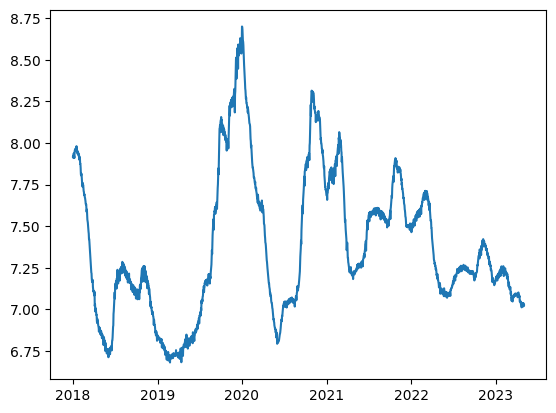

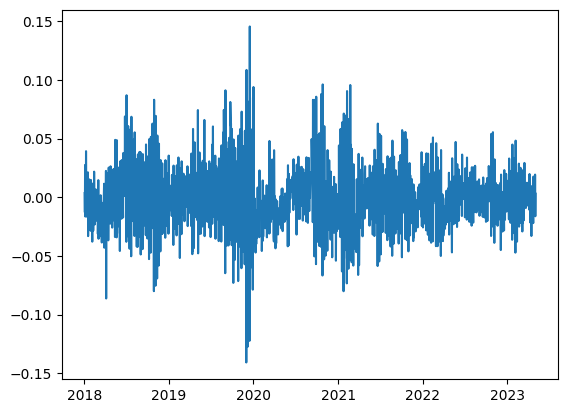

(-7.907354187493169, 4.033242501317796e-12, 10, 1937, {'1%': -3.4337304786522114, '5%': -2.8630332867971835, '10%': -2.5675649665362372}, -10009.349324472518)
(0.09174375157338503, 0.1, 22, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/tmp/ipykernel_54427/334363243.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(diff_commodity_up)


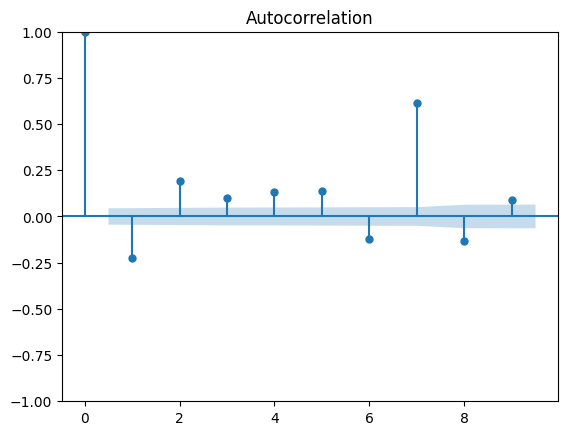

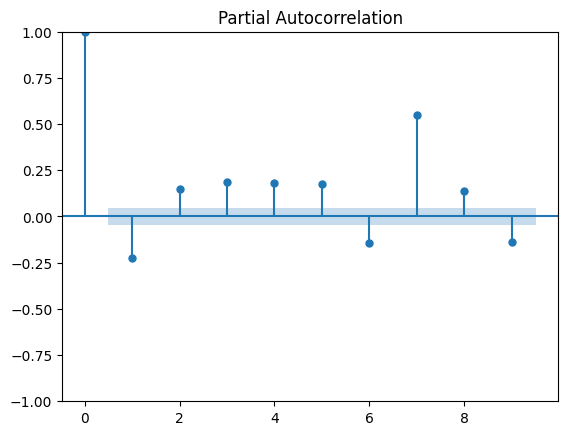

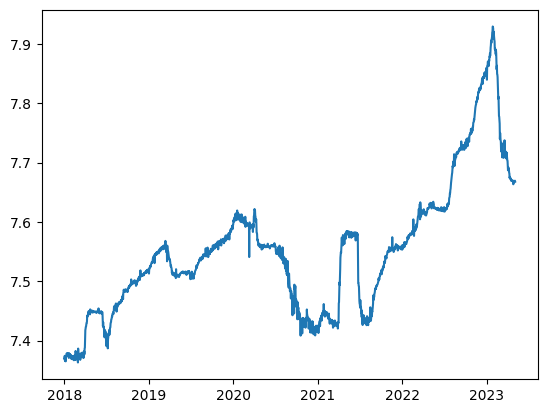

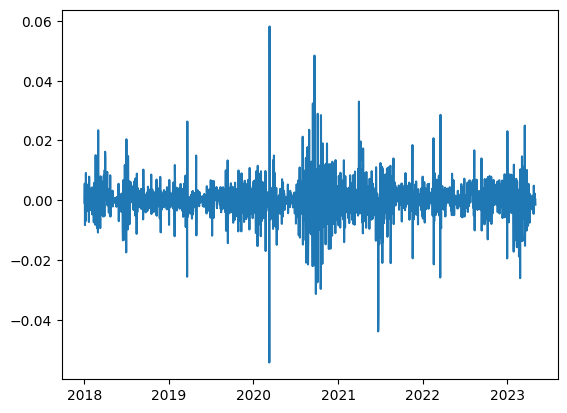

(-9.193848266964247, 2.0882252409825946e-15, 7, 1940, {'1%': -3.4337252441664483, '5%': -2.8630309758314314, '10%': -2.56756373605059}, -14706.35134581152)
(0.08786304084085927, 0.1, 18, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/tmp/ipykernel_54427/334363243.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(diff_commodity_up)


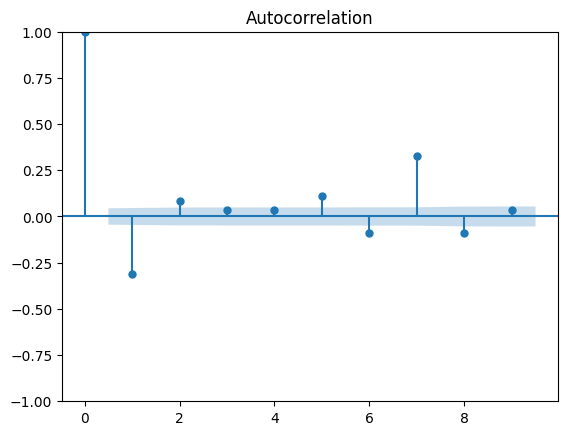

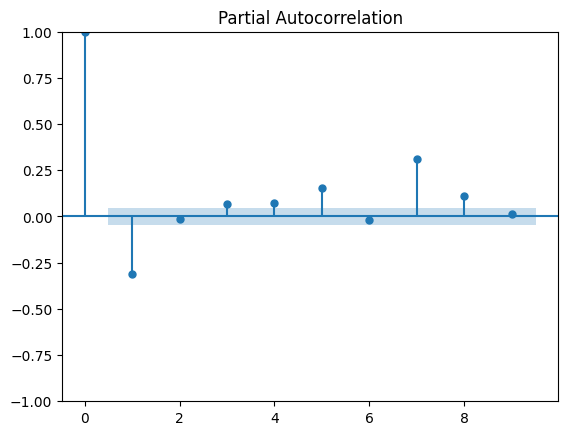

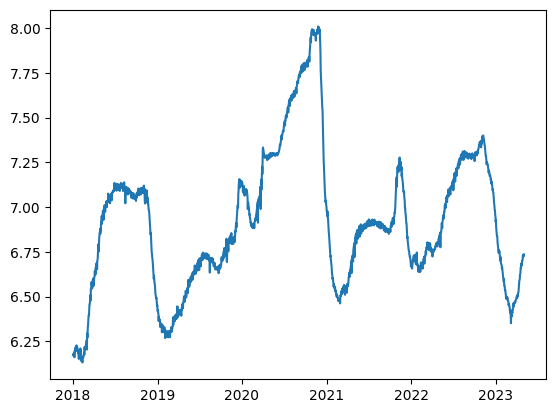

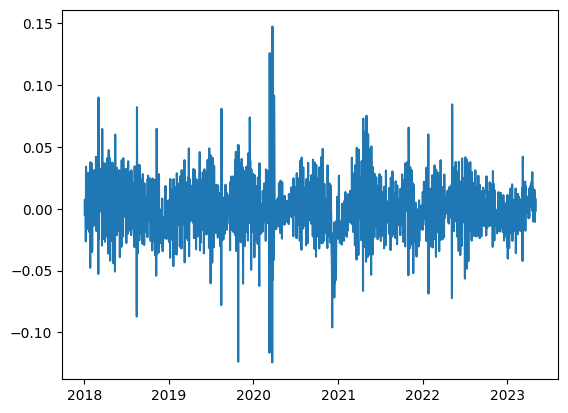

(-6.362524215771152, 2.4545032656241988e-08, 10, 1937, {'1%': -3.4337304786522114, '5%': -2.8630332867971835, '10%': -2.5675649665362372}, -10336.590762778138)
(0.18086288740447834, 0.1, 21, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/tmp/ipykernel_54427/334363243.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(diff_commodity_up)


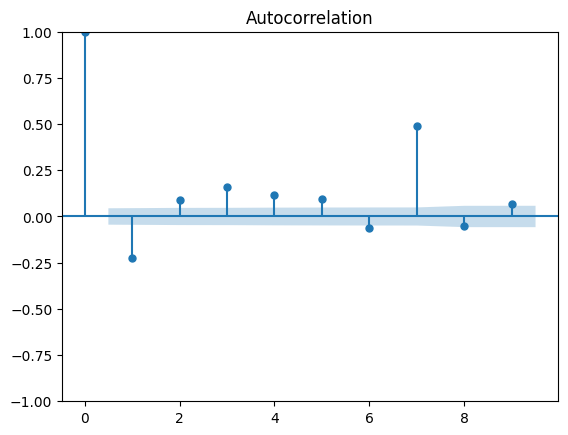

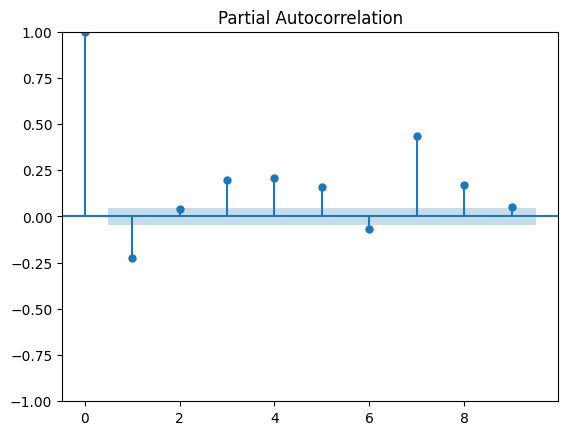

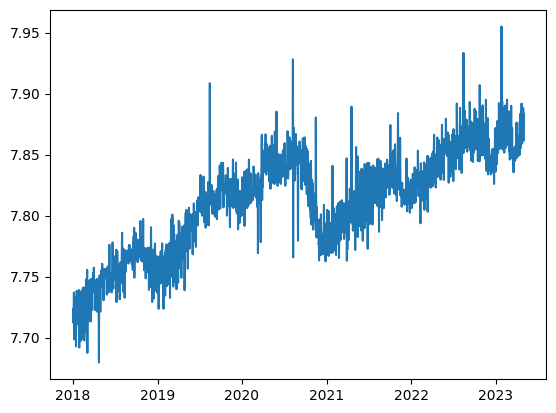

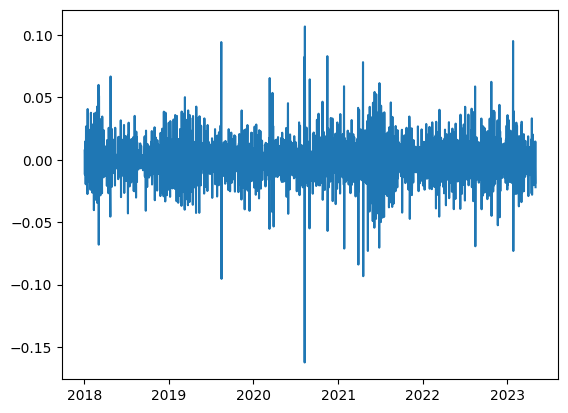

(-43.507467631664476, 0.0, 5, 1942, {'1%': -3.433721763505903, '5%': -2.8630294391572706, '10%': -2.567562917840866}, -11400.691290410497)
(0.11021930460080112, 0.1, 205, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/tmp/ipykernel_54427/334363243.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(diff_commodity_up)


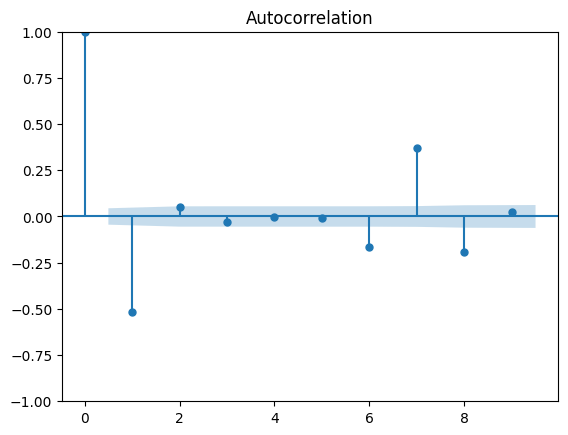

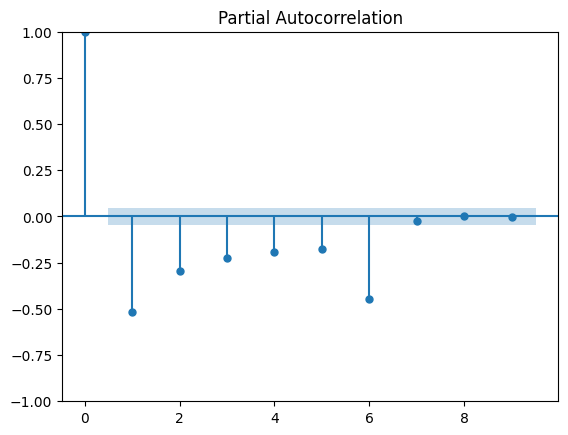

In [8]:
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

boxcox_diff_dfs = dict()
boxcox_dfs = dict()
for commodity in commodities:
    up_train_commodity = up_train[up_train['commodity'] == commodity]
    up_train_commodity_dt = up_train_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    boxcox_commodity_up = pd.Series(boxcox(up_train_commodity_dt['modal_rs_quintal'],lmbda=0),index=up_train_commodity_dt.index)
    diff_commodity_up = pd.Series(boxcox_commodity_up - boxcox_commodity_up.shift(),index=boxcox_commodity_up.index)
    diff_commodity_up.dropna(inplace=True)
    # print(boxcox_commodity_up ,commodity)
    plt.plot(boxcox_commodity_up)
    plt.show()
    plt.plot(diff_commodity_up)
    plt.show()
    adf = adfuller(diff_commodity_up, maxlag=10)
    print(adf)
    kpss_test = kpss(diff_commodity_up)
    print(kpss_test)
    plot_acf(diff_commodity_up,ax=plt.gca(),lags=9)
    plt.show()
    plot_pacf(diff_commodity_up,ax=plt.gca(),lags=9)
    plt.show()
    boxcox_diff_dfs[commodity] = diff_commodity_up
    boxcox_dfs[commodity] = boxcox_commodity_up

In [9]:
df_test_commodity = up_test[up_test['commodity'] == "Onion"]
df_test_commodity_dt = df_test_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
df_test_commodity_boxcox = pd.Series(boxcox(df_test_commodity_dt['modal_rs_quintal'],lmbda=0),index=df_test_commodity_dt.index)
df_test_commodity_boxcox_diff = pd.Series(df_test_commodity_boxcox - df_test_commodity_boxcox.shift(),index=df_test_commodity_boxcox.index)
df_test_commodity_boxcox_diff.dropna(inplace=True)

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

AR model params for  Onion
const    -0.000376
ar.L1    -0.213422
sigma2    0.000669
dtype: float64

ARMA model params for  Onion
const    -0.000378
ar.L1    -0.492465
ma.L1     0.281839
sigma2    0.000662
dtype: float64


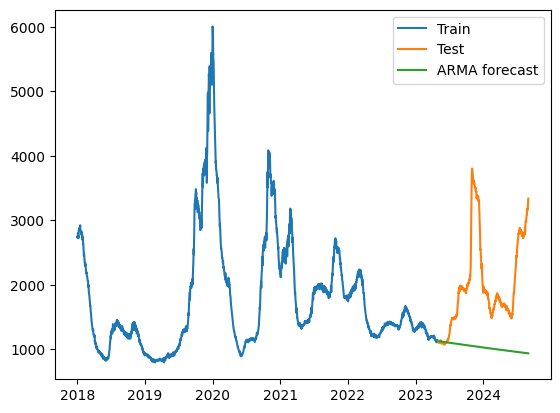

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

AR model params for  Wheat
const     0.000155
ar.L1    -0.332111
sigma2    0.000035
dtype: float64

ARMA model params for  Wheat
const     0.000154
ar.L1    -0.223560
ma.L1    -0.121493
sigma2    0.000035
dtype: float64


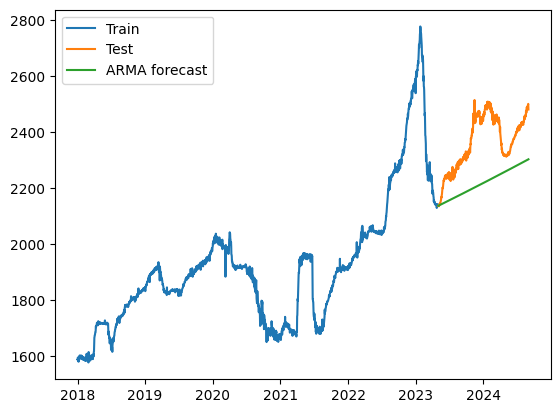

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

AR model params for  Potato
const     0.000370
ar.L1    -0.226457
sigma2    0.000436
dtype: float64

ARMA model params for  Potato
const     0.000370
ar.L1    -0.246726
ma.L1     0.021466
sigma2    0.000436
dtype: float64


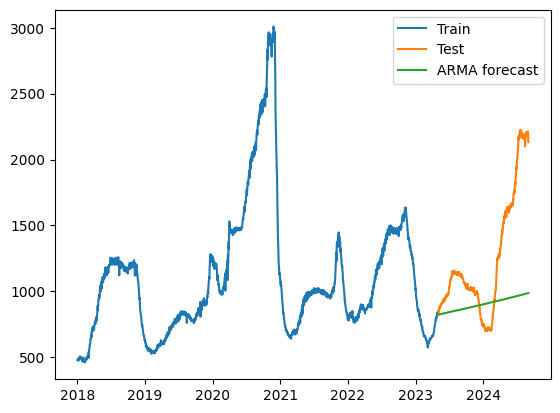

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

AR model params for  Rice
const     0.000076
ar.L1    -0.517688
sigma2    0.000250
dtype: float64

ARMA model params for  Rice
const     0.000072
ar.L1    -0.042077
ma.L1    -0.875145
sigma2    0.000186
dtype: float64


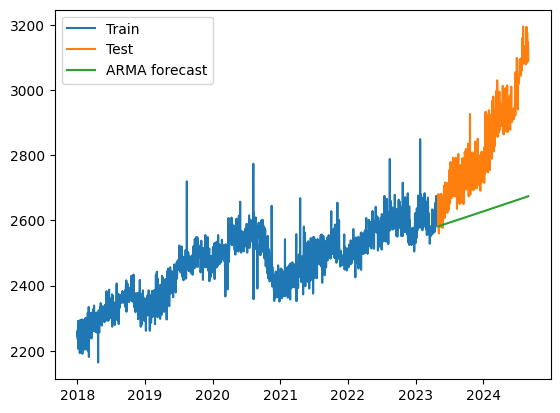

In [10]:
from statsmodels.tsa.arima.model import ARIMA
for commodity in commodities:
    train_len = int(len(boxcox_diff_dfs[commodity])*0.8)
    df_train = boxcox_diff_dfs[commodity][:train_len-1]
    df_test_commodity = up_test[up_test['commodity'] == commodity]
    df_test_commodity_dt = df_test_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    df_test_commodity_boxcox = pd.Series(boxcox(df_test_commodity_dt['modal_rs_quintal'],lmbda=0),index=df_test_commodity_dt.index)
    df_test_commodity_boxcox_diff = pd.Series(df_test_commodity_boxcox - df_test_commodity_boxcox.shift(),index=df_test_commodity_boxcox.index)
    df_test_commodity_boxcox_diff.dropna(inplace=True)
    df_test = df_test_commodity_boxcox_diff
    ar_model = ARIMA(df_train,order=(1,0,0))
    ar_model_fit = ar_model.fit()
    arma_model = ARIMA(df_train,order=(1,0,1))
    arma_model_fit = arma_model.fit()
    print("AR model params for ", commodity)
    print(ar_model_fit.params)
    print()
    print("ARMA model params for ", commodity)
    print(arma_model_fit.params)

    y_hat = df_test.copy()
    y_hat['arma_forecast_boxcox_diff'] = arma_model_fit.predict(df_test.index.min(), df_test.index.max())
    y_hat['arma_forecast_boxcox'] = y_hat['arma_forecast_boxcox_diff'].cumsum()
    y_hat['arma_forecast_boxcox'] = y_hat['arma_forecast_boxcox'].add(df_test_commodity_boxcox[0])
    y_hat['arma_forecast'] = np.exp(y_hat['arma_forecast_boxcox'])
    up_train_commodity = up_train[up_train['commodity'] == commodity]
    up_train_commodity_dt = up_train_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    up_test_commodity = up_test[up_test['commodity'] == commodity]
    up_test_commodity_dt = up_test_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    plt.plot(up_train_commodity_dt,label="Train")
    plt.plot(up_test_commodity_dt,label="Test")
    plt.plot(y_hat['arma_forecast'],label="ARMA forecast")
    plt.legend(loc="best")
    plt.show()

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.85472D+00    |proj g|=  6.19879D+00


 This problem is unconstrained.



At iterate    5    f= -1.88663D+00    |proj g|=  3.45523D+00

At iterate   10    f= -1.97227D+00    |proj g|=  1.19104D-01

At iterate   15    f= -1.98215D+00    |proj g|=  2.53520D+00

At iterate   20    f= -2.05437D+00    |proj g|=  1.06984D+00

At iterate   25    f= -2.06026D+00    |proj g|=  1.45346D-01

At iterate   30    f= -2.06074D+00    |proj g|=  3.32509D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     61      1     0     0   3.377D-02  -2.061D+00
  F =  -2.0607984018620824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


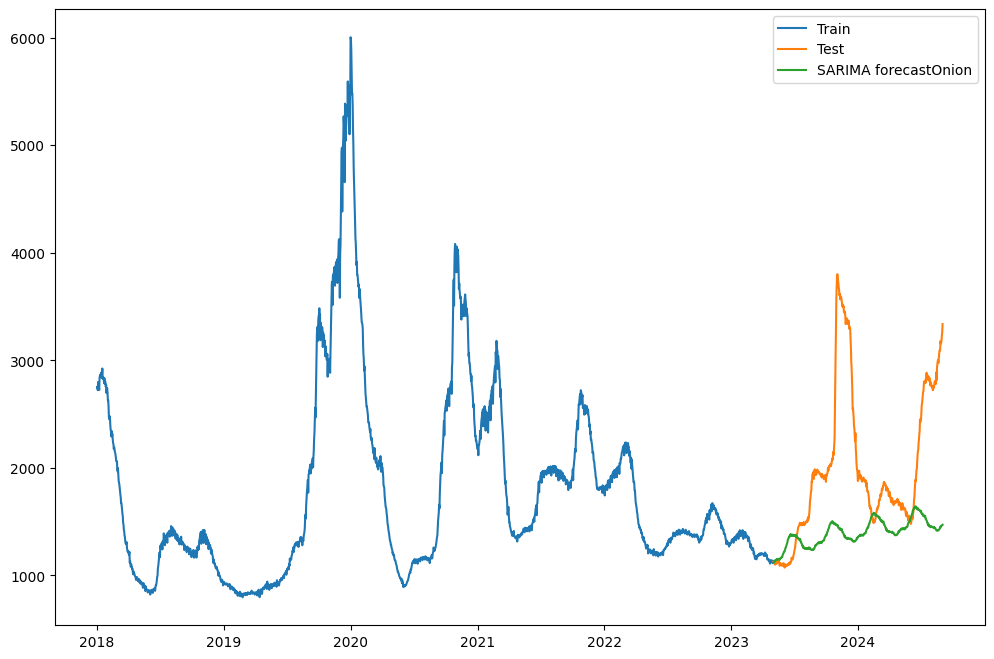

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02972D+00    |proj g|=  1.25130D+01


 This problem is unconstrained.



At iterate    5    f= -3.03456D+00    |proj g|=  6.95416D+00

At iterate   10    f= -3.26021D+00    |proj g|=  4.67856D+01

At iterate   15    f= -3.28018D+00    |proj g|=  7.76363D-02

At iterate   20    f= -3.28132D+00    |proj g|=  5.90709D+00

At iterate   25    f= -3.34722D+00    |proj g|=  1.26748D+01

At iterate   30    f= -3.35554D+00    |proj g|=  2.15748D+00

At iterate   35    f= -3.35724D+00    |proj g|=  9.27883D-01

At iterate   40    f= -3.35752D+00    |proj g|=  2.07046D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     62      1     0     0   2.071D+00  -3.358D+00
  F =  -3.35752371181

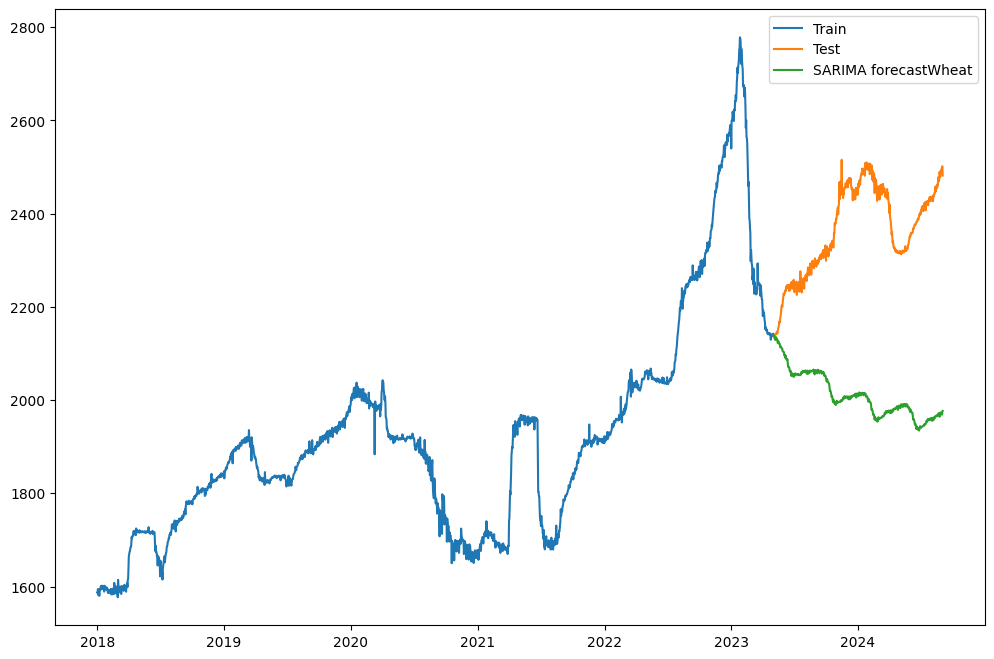

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.02128D+00    |proj g|=  6.83784D+00

At iterate    5    f= -2.04411D+00    |proj g|=  3.77315D+00

At iterate   10    f= -2.14833D+00    |proj g|=  6.59655D-01

At iterate   15    f= -2.20905D+00    |proj g|=  8.33312D+00

At iterate   20    f= -2.23013D+00    |proj g|=  1.71665D+00

At iterate   25    f= -2.23179D+00    |proj g|=  4.02795D-01

At iterate   30    f= -2.23199D+00    |proj g|=  3.33528D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

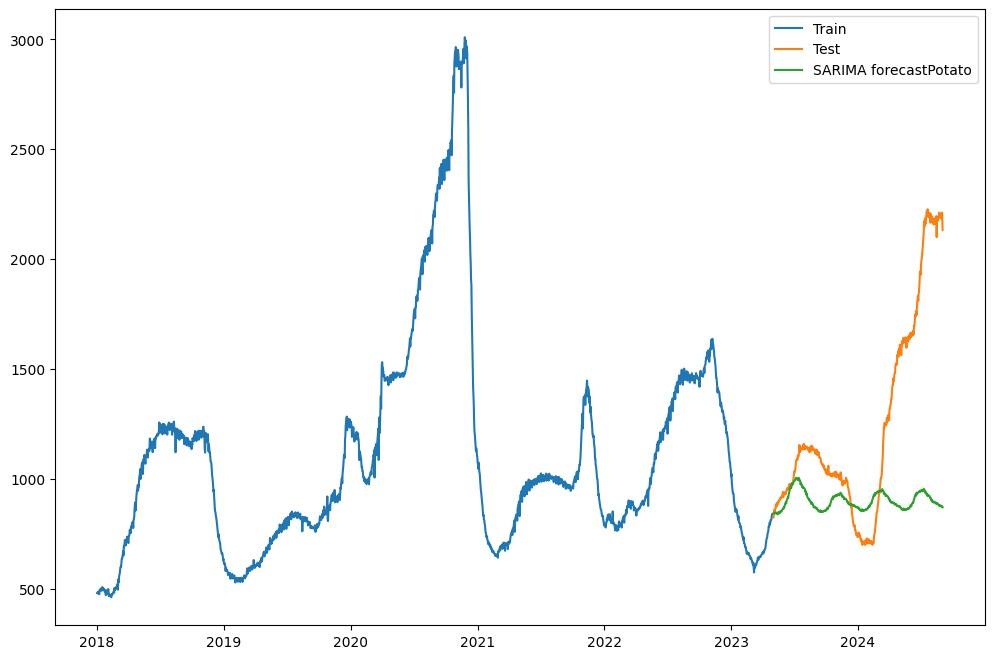

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26287D+00    |proj g|=  9.66014D+00

At iterate    5    f= -2.28081D+00    |proj g|=  4.13501D-01

At iterate   10    f= -2.31119D+00    |proj g|=  7.32596D+00

At iterate   15    f= -2.32120D+00    |proj g|=  4.34788D-01

At iterate   20    f= -2.33001D+00    |proj g|=  9.36089D-01

At iterate   25    f= -2.33517D+00    |proj g|=  4.53339D-02

At iterate   30    f= -2.33554D+00    |proj g|=  3.01119D-01

At iterate   35    f= -2.33570D+00    |proj g|=  7.21513D-01

At iterate   40    f= -2.33954D+00    |proj g|=  1.00312D+00

At iterate   45    f= -2.34366D+00    |proj g|=  1.64436D+00

At iterate   50    f= -2.34401D+00    |proj g|=  1.03731D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


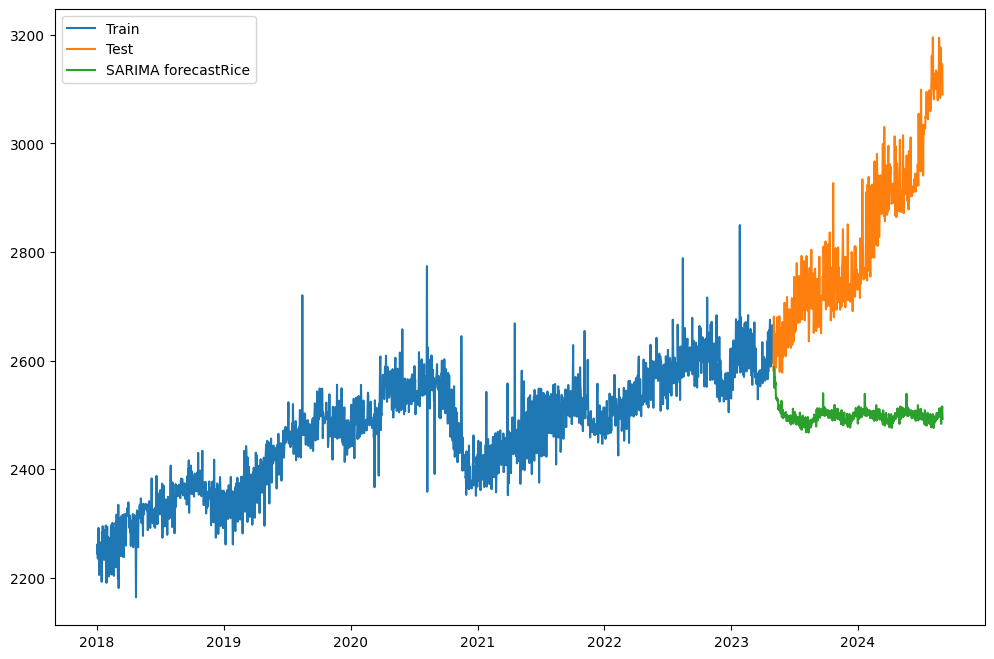

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
for commodity in commodities:
    boxcox_commodity = boxcox_dfs[commodity]
    model = SARIMAX(boxcox_commodity, seasonal_order=(1,1,1,120))
    model = model.fit()
    # print(model.params)

    y_hat_sarima = df_test_commodity_boxcox_diff.copy()
    y_hat_sarima['sarima_forecast_boxcox'] = model.predict(df_test_commodity_boxcox_diff.index.min(), df_test_commodity_boxcox_diff.index.max())
    y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

    up_train_commodity = up_train[up_train['commodity'] == commodity]
    up_train_commodity_dt = up_train_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})
    up_test_commodity = up_test[up_test['commodity'] == commodity]
    up_test_commodity_dt = up_test_commodity.groupby("datetime").agg({"modal_rs_quintal":"mean"})

    plt.figure(figsize=(12,8))
    plt.plot(up_train_commodity_dt,label="Train")
    plt.plot(up_test_commodity_dt,label="Test")
    plt.plot(y_hat_sarima['sarima_forecast'], label="SARIMA forecast" + commodity)
    plt.legend(loc="best")
    plt.show()

In [11]:
import numpy as np
import pandas as pd
from scipy.special import boxcox, inv_boxcox
from scipy.stats import boxcox_normmax
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.losses.pytorch import MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [26]:
df_test_commodity_dt['modal_rs_quintal']

datetime
2023-05-03    2581.857143
2023-05-04    2681.118421
2023-05-05    2662.755102
2023-05-06    2594.227273
2023-05-07    2559.982456
                 ...     
2024-08-28    3119.150442
2024-08-29    3136.592233
2024-08-30    3144.841667
2024-08-31    3146.494845
2024-09-01    3090.000000
Name: modal_rs_quintal, Length: 488, dtype: float64

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 368 K  | train
-------------------------------------------------------
252 K     Trainable params
115 K     Non-trainable params
368 K     Total params
1.472     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

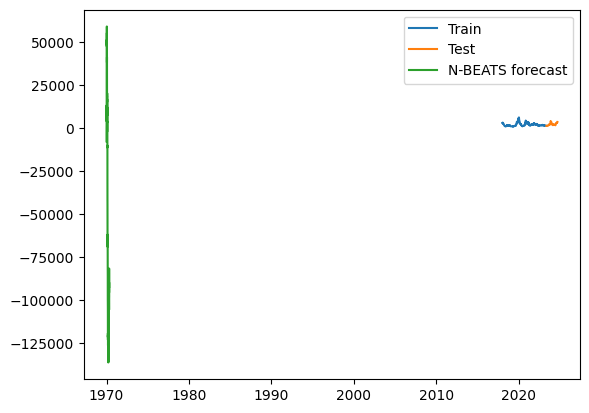

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 368 K  | train
-------------------------------------------------------
252 K     Trainable params
115 K     Non-trainable params
368 K     Total params
1.472     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mode


Index([2023-05-03 00:00:00, 2023-05-04 00:00:00, 2023-05-05 00:00:00,
       2023-05-06 00:00:00, 2023-05-07 00:00:00, 2023-05-08 00:00:00,
       2023-05-09 00:00:00, 2023-05-10 00:00:00, 2023-05-11 00:00:00,
       2023-05-12 00:00:00,
       ...
       2024-08-24 00:00:00, 2024-08-25 00:00:00, 2024-08-26 00:00:00,
       2024-08-27 00:00:00, 2024-08-28 00:00:00, 2024-08-29 00:00:00,
       2024-08-30 00:00:00, 2024-08-31 00:00:00, 2024-09-01 00:00:00,
         'nbeats_forecast'],
      dtype='object', name='datetime', length=489) [  -7942.016      -337.97363     743.97363    1819.1936    12966.657
   12844.865      3775.1035    15987.674     28822.658     34921.34
   40028.64      51115.55      47338.87      52477.312     58889.695
   55989.375     52737.344     48548.27      55148.055     48617.695
   37970.812     41028.652     29098.383     18055.203     18165.9
   14925.072     16618.709      9393.567     -2365.1377     9582.949
   20073.82       7165.5703    11937.896      9105

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

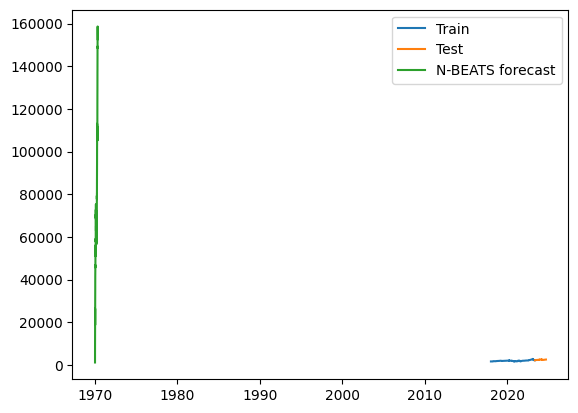

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 368 K  | train
-------------------------------------------------------
252 K     Trainable params
115 K     Non-trainable params
368 K     Total params
1.472     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mode


Index([2023-05-03 00:00:00, 2023-05-04 00:00:00, 2023-05-05 00:00:00,
       2023-05-06 00:00:00, 2023-05-07 00:00:00, 2023-05-08 00:00:00,
       2023-05-09 00:00:00, 2023-05-10 00:00:00, 2023-05-11 00:00:00,
       2023-05-12 00:00:00,
       ...
       2024-08-24 00:00:00, 2024-08-25 00:00:00, 2024-08-26 00:00:00,
       2024-08-27 00:00:00, 2024-08-28 00:00:00, 2024-08-29 00:00:00,
       2024-08-30 00:00:00, 2024-08-31 00:00:00, 2024-09-01 00:00:00,
         'nbeats_forecast'],
      dtype='object', name='datetime', length=489) [  1104.4114   9037.311   11987.908   15636.282   23154.264   26371.71
  18662.951   23896.969   29926.43    32670.564   35453.934   41341.543
  42599.4     43692.6     45385.11    46838.312   45648.68    46332.605
  48728.367   51304.746   53738.152   56106.492   51211.76    50920.984
  51786.51    54018.25    55305.586   53767.023   51018.484   54130.188
  59239.992   57650.5     62335.234   64446.227   70449.83    68857.09
  72748.36    72418.625   71510

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

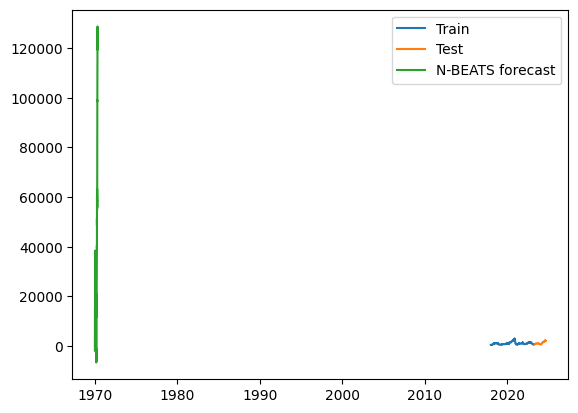

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 368 K  | train
-------------------------------------------------------
252 K     Trainable params
115 K     Non-trainable params
368 K     Total params
1.472     Total estimated model params size (MB)
32        Modules in train mode
0         Modules in eval mode


Index([2023-05-03 00:00:00, 2023-05-04 00:00:00, 2023-05-05 00:00:00,
       2023-05-06 00:00:00, 2023-05-07 00:00:00, 2023-05-08 00:00:00,
       2023-05-09 00:00:00, 2023-05-10 00:00:00, 2023-05-11 00:00:00,
       2023-05-12 00:00:00,
       ...
       2024-08-24 00:00:00, 2024-08-25 00:00:00, 2024-08-26 00:00:00,
       2024-08-27 00:00:00, 2024-08-28 00:00:00, 2024-08-29 00:00:00,
       2024-08-30 00:00:00, 2024-08-31 00:00:00, 2024-09-01 00:00:00,
         'nbeats_forecast'],
      dtype='object', name='datetime', length=489) [ -1837.5146    4534.7227    5572.6855    7502.1924   14297.01
  15403.844     8389.088    13976.988    22042.934    25235.848
  25487.107    29904.742    29573.477    32424.91     33581.98
  34297.89     33553.91     32538.072    38506.906    37340.414
  33712.926    34942.547    29107.178    27695.326    29522.492
  30280.031    26905.201    19450.963    13864.158    20460.816
  26891.826    22075.139    25840.645    28228.53     30696.848
  26878.277    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

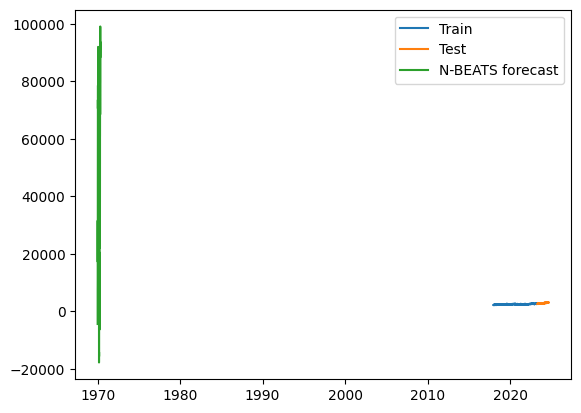

Index([2023-05-03 00:00:00, 2023-05-04 00:00:00, 2023-05-05 00:00:00,
       2023-05-06 00:00:00, 2023-05-07 00:00:00, 2023-05-08 00:00:00,
       2023-05-09 00:00:00, 2023-05-10 00:00:00, 2023-05-11 00:00:00,
       2023-05-12 00:00:00,
       ...
       2024-08-24 00:00:00, 2024-08-25 00:00:00, 2024-08-26 00:00:00,
       2024-08-27 00:00:00, 2024-08-28 00:00:00, 2024-08-29 00:00:00,
       2024-08-30 00:00:00, 2024-08-31 00:00:00, 2024-09-01 00:00:00,
         'nbeats_forecast'],
      dtype='object', name='datetime', length=489) [ -4384.794     7954.3213    8651.007    12040.041    28163.693
  31590.113    17220.621    28699.336    45101.414    54165.48
  61276.445    73597.53     70554.5      72153.805    78572.02
  78131.63     74107.84     74016.21     87415.1      87518.68
  84682.55     91993.91     79514.26     71177.84     73861.85
  71920.22     68078.6      59733.008    48028.086    61228.367
  74291.98     64681.617    72987.89     76924.93     78939.22
  71830.32     781

In [28]:
use_boxcox = False  # Set to False if not using Box-Cox

for commodity in commodities:
    # Train-test split
    train_len = int(len(boxcox_diff_dfs[commodity]) * 0.8)
    df_train = boxcox_diff_dfs[commodity][:train_len - 1]

    df_test_commodity = up_test[up_test['commodity'] == commodity]
    df_test_commodity_dt = df_test_commodity.groupby("datetime").agg({"modal_rs_quintal": "mean"})

    if use_boxcox:
        # Box-Cox transformation
        lmbda = boxcox_normmax(df_train)  # Optimize lambda for Box-Cox
        df_test_commodity_boxcox = pd.Series(boxcox(df_test_commodity_dt['modal_rs_quintal'], lmbda=lmbda),
                                             index=df_test_commodity_dt.index)
        df_test = pd.Series(df_test_commodity_boxcox - df_test_commodity_boxcox.shift(), index=df_test_commodity_boxcox.index)
        df_test.dropna(inplace=True)
    else:
        # df_test_commodity_dt.set_index("datetime")
        df_test = df_test_commodity_dt['modal_rs_quintal']

    # Prepare training data
    df_train = df_train.to_frame(name='y')
    df_train['unique_id'] = commodity
    df_train['ds'] = df_train.index

    # Prepare test data for predictions
    df_test_pred = df_test.to_frame(name='y')
    df_test_pred['unique_id'] = commodity
    df_test_pred['ds'] = df_test_pred.index
    input_size = 120  # Use past 14 days to forecast
    horizon = 120    # Forecasting the next 14 days

    # Initialize N-BEATS model
    nbeats_model = NBEATS(
    input_size=input_size,
    h=horizon,
    n_blocks=[2, 2],  # Two blocks each for trend and seasonality
    stack_types=['trend', 'seasonality'],  # Trend and seasonality stacks
    mlp_units=1*[[128, 128]],  # Hidden units for MLP layers in the blocks
    loss=MAE(),  # Mean Absolute Error
    )

    # Initialize NeuralForecast object
    fcst = NeuralForecast(models=[nbeats_model], freq='D')

    # Train the model on the training data
    fcst.fit(df_train)
    forecast = fcst.predict(df_test_pred)

# Prepare actual values and predicted values
    y_hat = df_test.copy()
    y_hat['nbeats_forecast'] = forecast['NBEATS'].values

    # If using Box-Cox, invert the transformation
    if use_boxcox:
        y_hat['nbeats_forecast'] = inv_boxcox(y_hat['nbeats_forecast'].cumsum(), lmbda)
    else:
        y_hat['nbeats_forecast'] = y_hat['nbeats_forecast'].cumsum()

    # Plot the results
    up_train_commodity = up_train[up_train['commodity'] == commodity]
    up_train_commodity_dt = up_train_commodity.groupby("datetime").agg({"modal_rs_quintal": "mean"})
    up_test_commodity_dt = up_test[up_test['commodity'] == commodity].groupby("datetime").agg({"modal_rs_quintal": "mean"})

    plt.plot(up_train_commodity_dt, label="Train")
    plt.plot(up_test_commodity_dt, label="Test")
    plt.plot(y_hat['nbeats_forecast'], label="N-BEATS forecast")
    plt.legend(loc="best")
    plt.show()
    mae = mean_absolute_error(df_test[:horizon], y_hat['nbeats_forecast'])
    rmse = np.sqrt(mean_squared_error(df_test[:horizon], y_hat['nbeats_forecast']))
    print(y_hat.index,y_hat['nbeats_forecast'])

    print(f'N-BEATS Mean Absolute Error (MAE): {mae:.4f}')
    print(f'N-BEATS Root Mean Squared Error (RMSE): {rmse:.4f}')